<h1 align="center"><b> BUSN 32120 Final Project </b></h1>
<h2 align="center"> Exploratory Data Analysis (EDA) on COVID-19 Fatality and Vaccination Rates </h2>

<div style="text-align: center;">
  <img src="covid-19.jpg" alt="COVID–19 Image" width="500"/>
</div>

<p align="center"><b>By: Bisma Rana</b></p>

## **Table of Contents**
- [Introduction](#Introduction)
- [Step 1: Importing Libraries & Data Access](#Step-1:-Importing-Libraries-&-Data-Access)
- [Step 2: Data Cleaning and Preprocessing](#Step-2:-Data-Cleaning-and-Preprocessing)
- [Step 3: Merging Datasets](#Step-3:-Merging-Datasets)
- [Step 4: Feature Engineering](#Step-4:-Feature-Engineering)
- [Step 5: Exploratory Data Analysis (EDA)](#Step-5:-Exploratory-Data-Analysis-(EDA))
- [Step 6: SQL Queries Analysis](#Step-6:-SQL-Queries-Analysis)
- [Step 7: Machine Learning Model](#Step-7:-Machine-Learning-Model)
- [Conclusion](#Conclusion)

## **Introduction**

This analysis explores COVID-19 case numbers, deaths, and vaccination rates across U.S. states. The objective is to understand how vaccination coverage influenced COVID-19 fatality outcomes and to potentially uncover patterns that highlight disparities in healthcare access across different regions. To do this, I used two datasets from CDC public APIs.

#### CDC Datasets

> - COVID-19 Case and Death Counts by State Over Time (2020-2023)
> - COVID-19 Vaccination Rates at the National & Jurisdictional Level (2020-2023)

#### Target Audience

> - **Public Health Officials**: Seeing where access to treatment was low and death rates were high can help officials focus future outreach efforts, such as resource planning, earlier public messaging, targeted health initiatives, etc. 
> - **Healthcare Policymakers**: Recognizing regional disparities in outcomes can guide decisions about how to strengthen healthcare systems, support underserved areas, and improve emergency preparedness efforts before future crises hit.  
> - **Epidemiologists and Public Health Researchers**: The data offers an opportunity to explore the root cause behind why fatality rates were high, helping refine future models, risk assessments, and intervention strategies for high-risk populations.  
> - **Healthcare Practitioners and Administrators**: For doctors, nurses, and hospital leaders, knowing that certain regions experienced worse outcomes could inform how they prioritize preventative care conversations, prepare emergency plans sooner, or advocate for earlier interventions when warning signs appear.

#### Research Questions

> - How did COVID-19 death rates vary across U.S. states during the pandemic?  
> - What relationship exists between COVID-19 vaccination and case fatality rates?  
> - Are there patterns that suggest disparities in healthcare access, vaccination efforts, or health system resilience?

#### My Motivation

> - Throughout the COVID-19 pandemic, daily case counts and death tolls dominated public conversations. Numbers alone couldn't capture the full story; beyond the statistics were deeply rooted disparities in healthcare access, public health infrastructure, and vaccine distribution that shaped different outcomes across communities.
> - **This project is especially personal to me.** I have spent 10+ years working in healthcare, including during the peak of the COVID-19 pandemic. I witnessed firsthand how structural inequalities played out in hospitals, clinics, and communities, affecting who had access to care, who received timely treatment, and who was left more vulnerable. These experiences drive my motivation to explore the data more deeply and to surface insights that could ultimately support better, more resilient healthcare systems.
> - I ultimately hope to contribute a perspective that combines lived experience with data-driven analysis, recognizing that understanding public health crises requires not just counting outcomes, but understanding the systems that create them.

## **Step 1: Importing Libraries & Data Access**

**Import Libraries** 

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Pull API Data**

In [2]:
# Define Function 
def pull_api_data(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data)
        print(f"Successfully pulled {len(df)} records from API")
        return df
    else:
        print(f"Failed to pull data. Status code: {response.status_code}")
        return None

# Define API Endpoints

# ~COVID-19 case and death data by state~
cases_deaths_api = 'https://data.cdc.gov/resource/pwn4-m3yp.json?$limit=50000'
# ~COVID-19 vaccination data by state~
vaccinations_api = 'https://data.cdc.gov/resource/unsk-b7fc.json?$limit=50000'

# Pull Data Into DataFrames
df_cases_deaths = pull_api_data(cases_deaths_api)
df_vaccinations = pull_api_data(vaccinations_api)

Successfully pulled 10380 records from API
Successfully pulled 38488 records from API


**Verify Data Structure**

In [3]:
# View Shape
print(df_cases_deaths.shape)
print(df_vaccinations.shape)

# View Columns
print("\nCases & Deaths Columns:")
print(df_cases_deaths.columns.tolist())

print("\nVaccination Columns:")
print(df_vaccinations.columns.tolist())

# View Sample of Data
print("\nSample from Cases & Deaths Dataset:")
display(df_cases_deaths.head())
print("\nSample from Vaccination Dataset:")
display(df_vaccinations.head())

(10380, 10)
(38488, 109)

Cases & Deaths Columns:
['date_updated', 'state', 'start_date', 'end_date', 'tot_cases', 'new_cases', 'tot_deaths', 'new_deaths', 'new_historic_cases', 'new_historic_deaths']

Vaccination Columns:
['date', 'mmwr_week', 'location', 'distributed', 'distributed_janssen', 'distributed_moderna', 'distributed_pfizer', 'distributed_unk_manuf', 'dist_per_100k', 'distributed_per_100k_12plus', 'distributed_per_100k_18plus', 'distributed_per_100k_65plus', 'administered', 'administered_12plus', 'administered_18plus', 'administered_65plus', 'administered_janssen', 'administered_moderna', 'administered_pfizer', 'administered_unk_manuf', 'admin_per_100k', 'admin_per_100k_12plus', 'admin_per_100k_18plus', 'admin_per_100k_65plus', 'recip_administered', 'administered_dose1_recip', 'administered_dose1_pop_pct', 'administered_dose1_recip_12plus', 'administered_dose1_recip_12pluspop_pct', 'administered_dose1_recip_18plus', 'administered_dose1_recip_18pluspop_pct', 'administered_do

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2023-02-23T00:00:00.000,AZ,2023-02-16T00:00:00.000,2023-02-22T00:00:00.000,2434631.0,3716.0,33042.0,39.0,23150,0
1,2022-12-22T00:00:00.000,LA,2022-12-15T00:00:00.000,2022-12-21T00:00:00.000,1507707.0,4041.0,18345.0,21.0,21397,0
2,2023-02-23T00:00:00.000,GA,2023-02-16T00:00:00.000,2023-02-22T00:00:00.000,3061141.0,5298.0,42324.0,88.0,6800,0
3,2023-03-30T00:00:00.000,LA,2023-03-23T00:00:00.000,2023-03-29T00:00:00.000,1588259.0,2203.0,18858.0,23.0,5347,0
4,2023-02-02T00:00:00.000,LA,2023-01-26T00:00:00.000,2023-02-01T00:00:00.000,1548508.0,5725.0,18572.0,47.0,4507,0



Sample from Vaccination Dataset:


,date,mmwr_week,location,distributed,distributed_janssen,distributed_moderna,distributed_pfizer,distributed_unk_manuf,dist_per_100k,distributed_per_100k_12plus,...,dist_bivalent_mod,bivalent_booster_5plus,bivalent_booster_5plus_pop_pct,bivalent_booster_12plus,bivalent_booster_12plus_pop_pct,bivalent_booster_18plus,bivalent_booster_18plus_pop_pct,bivalent_booster_65plus,bivalent_booster_65plus_pop_pct,second_booster
0,2021-10-30T00:00:00.000,43,TX,44779195,2217800,17258060,25303335,0,154433,185797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-30T00:00:00.000,43,NJ,15160695,746500,5817260,8596935,0,170686,199002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-27T00:00:00.000,53,PA,291825,0,0,0,0,2280,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-27T00:00:00.000,53,AK,45250,0,0,0,0,6186,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-16T00:00:00.000,51,WI,49725,0,0,0,0,854,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Step 2: Data Cleaning and Preprocessing**

**Check for Missing Values**

In [4]:
print("\nMissing Values in Cases & Deaths:")
print(df_cases_deaths.isnull().sum())

print("\nMissing Values in Vaccinations:")
print(df_vaccinations.isnull().sum())


Missing Values in Cases & Deaths:
date_updated           0
state                  0
start_date             0
end_date               0
tot_cases              0
new_cases              0
tot_deaths             0
new_deaths             0
new_historic_cases     0
new_historic_deaths    0
dtype: int64

Missing Values in Vaccinations:
date                                   0
mmwr_week                              0
location                               0
distributed                            0
distributed_janssen                    0
                                   ...  
bivalent_booster_18plus            36504
bivalent_booster_18plus_pop_pct    36504
bivalent_booster_65plus            36504
bivalent_booster_65plus_pop_pct    36504
second_booster                     38385
Length: 109, dtype: int64


In [5]:
# Print Header to Label Output Section
print("\nMissing Values in Cases & Deaths - ", end="")

# Count Missing Values for Each Column in Cases & Deaths Dataset
missing = df_cases_deaths.isnull().sum()

# Print Number of Columns with At Least One Missing Value
print(len(missing[missing > 0]), "Columns with missing values: \n")

# Show Actual Columns and Number of Values Missing in Each
print(missing[missing > 0])


Missing Values in Cases & Deaths - 0 Columns with missing values: 

Series([], dtype: int64)


In [6]:
# Print Header to Label Output Section
print("\nMissing Values in Vaccinations - ", end="")

# Count Missing Values for Each Column in Vaccination Dataset
missing = df_vaccinations.isnull().sum()

# Print Number of Columns with At Least One Missing Value
print(len(missing[missing > 0]), "Columns with missing values: \n")

# Show Actual Columns and Number of Values Missing in Each
print(missing[missing > 0])


Missing Values in Vaccinations - 56 Columns with missing values: 

administered_unk_manuf                       3
series_complete_unk_manuf                    4
series_complete_unk_manuf_1                  4
series_complete_unk_manuf_2                  4
series_complete_unk_manuf_3                  9
additional_doses                         16348
additional_doses_vax_pct                   325
additional_doses_18plus                    325
additional_doses_18plus_vax_pct            325
additional_doses_50plus                    325
additional_doses_65plus                    325
additional_doses_65plus_vax_pct            325
additional_doses_moderna                   325
additional_doses_pfizer                    325
additional_doses_janssen                   327
additional_doses_unk_manuf                 331
distributed_per_100k_5plus                 448
administered_5plus                         448
admin_per_100k_5plus                       448
administered_dose1_recip_5plus         

**Clean Cases & Deaths Dataset**

In [7]:
# Keep Relevant Columns Only
df_cases_deaths = df_cases_deaths[['state', 'start_date' , 'end_date', 'tot_cases', 'tot_deaths', 'new_cases', 'new_deaths']]

# Rename Columns for Clarity 
df_cases_deaths = df_cases_deaths.rename(columns={
    'end_date': 'date',
    'tot_cases': 'total_cases',
    'tot_deaths': 'total_deaths'
})

# Convert Date to Datetime
df_cases_deaths['date'] = pd.to_datetime(df_cases_deaths['date'], errors='coerce')

In [8]:
# Sort Cases & Deaths Dataset by Date in Ascending (Chronological) Order
# Reset Index so Row Numbers are Sequential After Sorting
df_cases_deaths = df_cases_deaths.sort_values(by='date', ascending=True).reset_index(drop=True)

# Display Cleaned and Sorted DataFrame
df_cases_deaths

,state,start_date,date,total_cases,total_deaths,new_cases,new_deaths
0,LA,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0
1,MN,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0
2,SC,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0
3,DE,2020-01-16T00:00:00.000,2020-01-22,5.0,0.0,5.0,0.0
4,IL,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10375,NY,2023-05-04T00:00:00.000,2023-05-10,3572043.0,32341.0,1823.0,32.0
10376,MA,2023-05-04T00:00:00.000,2023-05-10,2242176.0,24644.0,1221.0,15.0
10377,NV,2023-05-04T00:00:00.000,2023-05-10,898511.0,12008.0,640.0,10.0
10378,IL,2023-05-04T00:00:00.000,2023-05-10,4136659.0,42005.0,851.0,0.0


**Clean Vaccination Dataset**

*Explanation:* To clean the vaccination dataset, I dropped columns with over 70% missing values (commonly used threshold, typically between 60-80%) because they didn’t provide enough data to be useful and would have added unnecessary noise to the analysis. I kept key columns like `booster_pct`, `fully_vaccinated_pct`, and `one_dose_pct` since they directly relate to my research questions. Even though a few of these had some missing values, I chose to keep them because the gaps mostly occurred early in the vaccine rollout, which made sense contextually. This approach helped simplify the dataset while keeping the most relevant information intact.

In [9]:
# Define Threshold for Missing Values 
threshold = 0.7 * len(df_vaccinations)

# Drop Columns with >70% Missing Values 
df_vaccinations = df_vaccinations.dropna(axis=1, thresh=len(df_vaccinations) - threshold)

# Calculate Missing Values per Column 
missing = df_vaccinations.isnull().sum()
print(len(missing[missing > 0]), "Columns with missing values: \n")
print(missing[missing > 0])

29 Columns with missing values: 

administered_unk_manuf                       3
series_complete_unk_manuf                    4
series_complete_unk_manuf_1                  4
series_complete_unk_manuf_2                  4
series_complete_unk_manuf_3                  9
additional_doses                         16348
additional_doses_vax_pct                   325
additional_doses_18plus                    325
additional_doses_18plus_vax_pct            325
additional_doses_50plus                    325
additional_doses_65plus                    325
additional_doses_65plus_vax_pct            325
additional_doses_moderna                   325
additional_doses_pfizer                    325
additional_doses_janssen                   327
additional_doses_unk_manuf                 331
distributed_per_100k_5plus                 448
administered_5plus                         448
admin_per_100k_5plus                       448
administered_dose1_recip_5plus             448
administered_dose1_recip_5

In [10]:
# Keep Relevant Columns Only
df_vaccinations = df_vaccinations[[
    'location', 'date',
    'series_complete_pop_pct',
    'administered_dose1_pop_pct',
    'additional_doses_vax_pct',
    'series_complete_65pluspop',
    'additional_doses_65plus_vax_pct'
]]

# Rename Columns for Clarity 
df_vaccinations = df_vaccinations.rename(columns={
    'location': 'state',
    'series_complete_pop_pct': 'fully_vaccinated_pct',
    'administered_dose1_pop_pct': 'one_dose_pct',
    'additional_doses_vax_pct': 'booster_pct',
    'series_complete_65pluspop': 'fully_vaccinated_65plus_pct',
    'additional_doses_65plus_vax_pct': 'booster_65plus_pct'
})

# Convert Date to Datetime
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'], errors='coerce')

**Verify Data Structure**

In [11]:
# View Shape 
print("\nCases & Deaths Data Shape:", df_cases_deaths.shape)
print("Vaccination Data Shape:", df_vaccinations.shape)

# View Columns 
print("\nCases & Deaths Columns:", df_cases_deaths.columns.tolist())
print("Vaccination Columns:", df_vaccinations.columns.tolist())


Cases & Deaths Data Shape: (10380, 7)
Vaccination Data Shape: (38488, 7)

Cases & Deaths Columns: ['state', 'start_date', 'date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']
Vaccination Columns: ['state', 'date', 'fully_vaccinated_pct', 'one_dose_pct', 'booster_pct', 'fully_vaccinated_65plus_pct', 'booster_65plus_pct']


**Check Unique Date Ranges**

*Explanation*: There's a slight difference between the start dates of both datasets, which is expected since vaccinations began after the pandemic started.

In [12]:
print("Cases & Deaths Dates Range:")
print(df_cases_deaths['date'].min(), "to", df_cases_deaths['date'].max())

print("\nVaccination Dates Range:")
print(df_vaccinations['date'].min(), "to", df_vaccinations['date'].max())

Cases & Deaths Dates Range:
2020-01-22 00:00:00 to 2023-05-10 00:00:00

Vaccination Dates Range:
2020-12-13 00:00:00 to 2023-05-10 00:00:00


**Check Unique Values Sample**

In [13]:
print("\nSample Dates from Cases & Deaths:")
print(df_cases_deaths['date'].sort_values().unique()[:10])

print("\nSample Dates from Vaccinations:")
print(df_vaccinations['date'].sort_values().unique()[:10])


Sample Dates from Cases & Deaths:
<DatetimeArray>
['2020-01-22 00:00:00', '2020-01-29 00:00:00', '2020-02-05 00:00:00',
 '2020-02-12 00:00:00', '2020-02-19 00:00:00', '2020-02-26 00:00:00',
 '2020-03-04 00:00:00', '2020-03-11 00:00:00', '2020-03-18 00:00:00',
 '2020-03-25 00:00:00']
Length: 10, dtype: datetime64[ns]

Sample Dates from Vaccinations:
<DatetimeArray>
['2020-12-13 00:00:00', '2020-12-14 00:00:00', '2020-12-15 00:00:00',
 '2020-12-16 00:00:00', '2020-12-17 00:00:00', '2020-12-18 00:00:00',
 '2020-12-19 00:00:00', '2020-12-20 00:00:00', '2020-12-21 00:00:00',
 '2020-12-22 00:00:00']
Length: 10, dtype: datetime64[ns]


**Check for Missing Dates** 

In [14]:
print("\nMissing Dates in Cases & Deaths:", df_cases_deaths['date'].isnull().sum())
print("Missing Dates in Vaccinations:", df_vaccinations['date'].isnull().sum())


Missing Dates in Cases & Deaths: 0
Missing Dates in Vaccinations: 0


**Aggregate Vaccination Data to Weekly Level**

In [15]:
# Convert Vaccination Columns to Numeric, Force Errors to NaN
cols_to_convert = [
    'fully_vaccinated_pct',
    'one_dose_pct',
    'booster_pct',
    'fully_vaccinated_65plus_pct',
    'booster_65plus_pct'
]

for col in cols_to_convert:
    df_vaccinations[col] = pd.to_numeric(df_vaccinations[col], errors='coerce')

# Create 'Week' Column
df_vaccinations['week'] = df_vaccinations['date'] - pd.to_timedelta(df_vaccinations['date'].dt.weekday, unit='d') + pd.Timedelta(days=2) #Realign to Wednesday 

# Group by 'State' and 'Week' and Take Mean
df_vaccinations_weekly = df_vaccinations.groupby(['state', 'week']).agg({
    'fully_vaccinated_pct': 'mean',
    'one_dose_pct': 'mean',
    'booster_pct': 'mean',
    'fully_vaccinated_65plus_pct': 'mean',
    'booster_65plus_pct': 'mean'
}).reset_index()

# Rename 'Week' Column Back to Date
df_vaccinations_weekly = df_vaccinations_weekly.rename(columns={'week': 'date'})

In [16]:
# Sort by Date
df_vaccinations_weekly = df_vaccinations_weekly.sort_values(by='date', ascending=True).reset_index(drop=True) 

In [17]:
# Final Check for Null Values 
df_vaccinations_weekly.isna().sum() 

state                          0
date                           0
fully_vaccinated_pct           0
one_dose_pct                   0
booster_pct                    0
fully_vaccinated_65plus_pct    0
booster_65plus_pct             0
dtype: int64

**View Cleaned Samples**

In [18]:
print("\nCleaned Cases & Deaths Data:\n")
df_cases_deaths.head()


Cleaned Cases & Deaths Data:



,state,start_date,date,total_cases,total_deaths,new_cases,new_deaths
0,LA,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0
1,MN,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0
2,SC,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0
3,DE,2020-01-16T00:00:00.000,2020-01-22,5.0,0.0,5.0,0.0
4,IL,2020-01-16T00:00:00.000,2020-01-22,0.0,0.0,0.0,0.0


In [19]:
print("\nCleaned Vaccination Data (Weekly Aggregated):")
df_vaccinations_weekly.head()


Cleaned Vaccination Data (Weekly Aggregated):


,state,date,fully_vaccinated_pct,one_dose_pct,booster_pct,fully_vaccinated_65plus_pct,booster_65plus_pct
0,AS,2020-12-09,0.0,0.0,0.0,0.0,0.0
1,LTC,2020-12-09,0.0,0.0,0.0,0.0,0.0
2,MP,2020-12-09,0.0,0.0,0.0,0.0,0.0
3,GU,2020-12-09,0.0,0.0,0.0,0.0,0.0
4,US,2020-12-09,0.0,0.0,0.0,0.0,0.0


**Check for Outliers in Cases & Deaths Dataset**

*Explanation:* To check for outliers in the cases and deaths dataset, I used boxplots and found extreme values, including negative `new_deaths` and unusually high `new_cases`. The negative values appeared in isolation, with no surrounding trend to suggest legitimate corrections, so I treated them as data entry errors and converted them to absolute values. In contrast, large new_cases values aligned with known surges (e.g., Omicron), so I retained them. This approach ensures likely errors are corrected without discarding real trends.

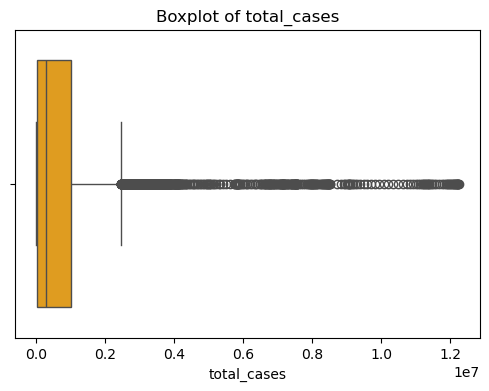

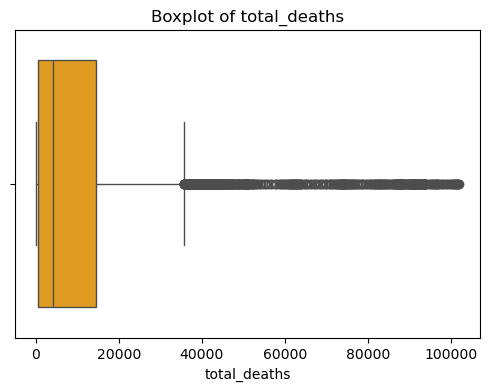

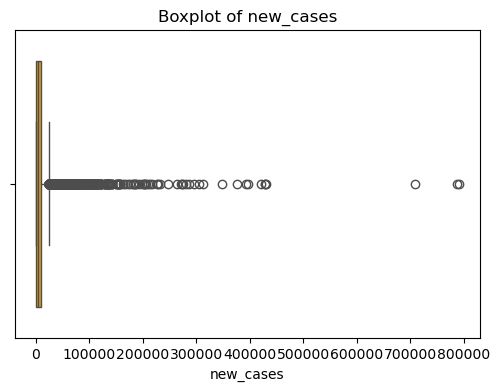

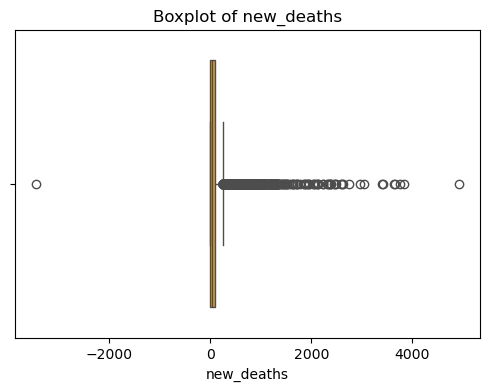

In [20]:
# Define Numeric Columns to Check for Outliers 
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']

# Convert Columns to Numeric
for col in numeric_cols:
    df_cases_deaths[col] = pd.to_numeric(df_cases_deaths[col], errors='coerce')

# Create Boxplot 
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_cases_deaths[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [21]:
# Filter to Check Rows with 'Negative' New Deaths 
df_cases_deaths[df_cases_deaths['new_deaths'] < 0]

# Manually Inspect Random Rows 
df_cases_deaths.sample(10)

# Convert Negative Values in New Deaths to Positive (Absolute Value)
df_cases_deaths['new_deaths'] = abs(df_cases_deaths['new_deaths'])

# Recheck to Confirm 
df_cases_deaths[df_cases_deaths['new_deaths'] < 0]

# View Sample 
df_cases_deaths.sample(5)

,state,start_date,date,total_cases,total_deaths,new_cases,new_deaths
7717,ME,2022-06-30T00:00:00.000,2022-07-06,271149.0,2453.0,1223.0,38.0
9412,WI,2023-01-12T00:00:00.000,2023-01-18,1975539.0,15989.0,4609.0,55.0
3168,MA,2021-01-14T00:00:00.000,2021-01-20,481040.0,13829.0,32593.0,470.0
3626,KS,2021-03-11T00:00:00.000,2021-03-17,300003.0,4819.0,1542.0,34.0
7745,NH,2022-07-07T00:00:00.000,2022-07-13,334845.0,2604.0,1594.0,10.0


**Check for Outliers in Vaccinations Dataset**

*Explanation*: To check for outliers in the vaccination dataset, I created boxplots for key percentage-based columns such as `fully_vaccinated_pct`, `booster_pct`, and others. All values fall within the expected 0–100% range with no extreme deviations, suggesting there are no outliers in this dataset. Therefore, no additional cleaning was needed for these variables.

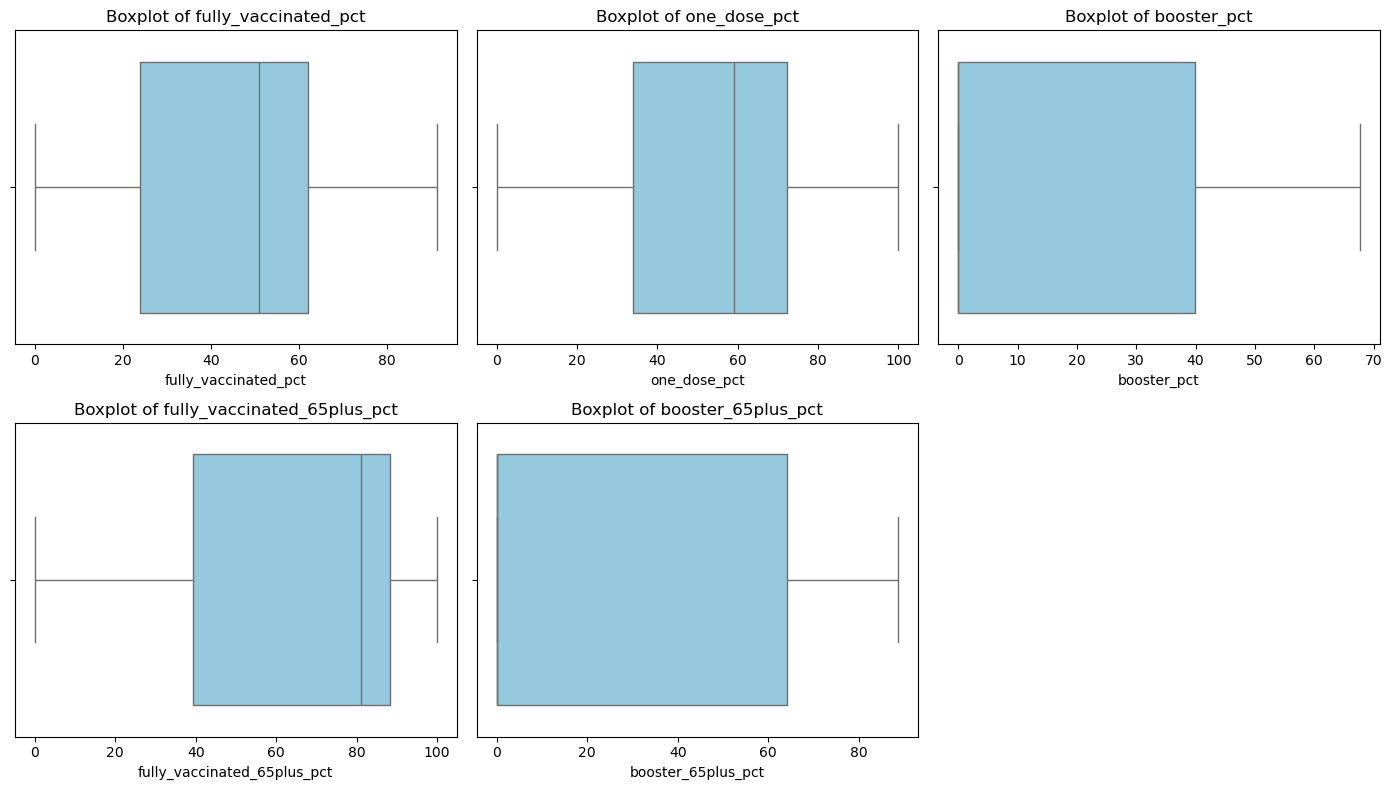

In [22]:
# Define Numeric Columns to Check for Outliers 
vax_numeric_cols = [
    'fully_vaccinated_pct',
    'one_dose_pct',
    'booster_pct',
    'fully_vaccinated_65plus_pct',
    'booster_65plus_pct'
]

# Create Boxplot 
plt.figure(figsize=(14, 8))
for i, col in enumerate(vax_numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_vaccinations[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

**Store Cleaned Datasets into SQLite Database**

Before merging the datasets or performing additional transformations, I stored the cleaned versions of the cases and vaccinations datasets into a SQLite database. This step preserves the integrity of the cleaned data, capturing it in its final pre-merged form. By doing this early, I ensure that I can reference or query the standardized datasets later without worrying about changes introduced during merging or analysis. It also enables more efficient SQL-based exploration while keeping the raw structure intact.

In [23]:
# Store Data into SQLite Database 
import sqlite3
import os

# Define Database File Name 
db_filename = "covid_analysis.db"

# Connect to SQLite Database 
conn = sqlite3.connect(db_filename)

# Store Cases & Deaths Dataframe as Table
df_cases_deaths.to_sql("cases_deaths", conn, if_exists="replace", index=False)

# Store Weekly Aggregated Vaccinations Dataframe as Table
df_vaccinations_weekly.to_sql("vaccinations_weekly", conn, if_exists="replace", index=False)

# Close Database Connection
conn.close()

# Confirm Storage Completion 
print(f"Data stored in {db_filename} (tables: cases_deaths, vaccinations_weekly)")

Data stored in covid_analysis.db (tables: cases_deaths, vaccinations_weekly)


#### **Key Findings:**

The **vaccination dataset** initially reported data on a **daily basis**, while the **cases and deaths** dataset provided **weekly updates** (typically every Wednesday). To align the two datasets for accurate merging and analysis, I did the following:
1. Rounded each vaccination record's date to the nearest Wednesday.
2. Aggregated the vaccination data by `state` and `week`, calculating the average vaccination percentages within each week.

This weekly aggregation ensures that both datasets now share a consistent time resolution, making future comparisons and merging reliable.

#### **Observations:**
- In early weeks (December 2020), vaccination coverage fields (e.g., fully vaccinated %, 1st dose %) were close to 0%, which aligns with the timeline of vaccine rollout.
- Booster doses show missing values (`NaN`) in the early days, which is expected because these vaccination programs started later during the pandemic.

## **Step 3: Merging Datasets**

In [24]:
# Merging on State and Date Using an Inner Join 
df_merged = pd.merge(df_cases_deaths, df_vaccinations_weekly, on=['state', 'date'], how='inner')

# View Shape and Sample of Merged Dataset
print("Merged dataset shape:", df_merged.shape)
print("\nSample of merged data:")
display(df_merged.head())

# Check for Missing Values After Merging
print("\nMissing values after merging:")
print(df_merged.isnull().sum())

Merged dataset shape: (7127, 12)

Sample of merged data:


,state,start_date,date,total_cases,total_deaths,new_cases,new_deaths,fully_vaccinated_pct,one_dose_pct,booster_pct,fully_vaccinated_65plus_pct,booster_65plus_pct
0,VI,2020-12-03T00:00:00.000,2020-12-09,1698.0,23.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GU,2020-12-03T00:00:00.000,2020-12-09,7039.0,113.0,119.0,1.0,0.0,0.0,0.0,0.0,0.0
2,MP,2020-12-03T00:00:00.000,2020-12-09,113.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS,2020-12-03T00:00:00.000,2020-12-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LA,2020-12-10T00:00:00.000,2020-12-16,275551.0,6932.0,16625.0,249.0,0.0,0.0,0.0,0.0,0.0



Missing values after merging:
state                          0
start_date                     0
date                           0
total_cases                    0
total_deaths                   0
new_cases                      0
new_deaths                     0
fully_vaccinated_pct           0
one_dose_pct                   0
booster_pct                    0
fully_vaccinated_65plus_pct    0
booster_65plus_pct             0
dtype: int64


#### **Key Findings:**
After completing the cleaning and weekly aggregation steps, the cases, deaths, and vaccination datasets were successfully merged using `state` and `date` as common keys.

The final merged dataset contains **7,127 records** across **12 columns**, including cumulative case counts, cumulative deaths, and vaccination metrics such as fully vaccinated percentage, one-dose percentage, and booster uptake across general and senior populations.

#### **Observations:**
- Vaccination metrics such as `fully_vaccinated_pct` and `one_dose_pct` are consistently populated throughout the dataset.
- The `booster_pct` field contains missing values in early periods, which aligns with the later introduction of booster programs (especially bivalent boosters in Fall 2022).
- No missing values were found in core fields such as `total_cases`, `total_deaths`, or the main vaccination coverage variables.

This merged structure provides a clean, analysis-ready dataset that supports deeper insights into how vaccination coverage relates to COVID-19 case and death trends over time and across different states.

## **Step 4: Feature Engineering**

To make my EDA visualizations more clear, I created the following new columns:

1. **Case Fatality Rate (CFR):**  
  Calculated as `(total_deaths / total_cases) * 100`, this metric indicates the severity of COVID-19 by showing the proportion of confirmed cases that resulted in death.

2. **Vaccination Coverage Category:**  
  Classifying states into 'Low', 'Medium', or 'High' categories based on their fully vaccinated population percentages will allow us to compare outcomes across different vaccination levels.

3. **Elderly Protection Index:**  
  By averaging the full vaccination and booster uptake percentages among the 65+ population, we can create an index that reflects the level of protection for the most vulnerable demographic.

4. **Fatality Risk Classification:**  
   To support categorical comparisons, I classified each row into 'Low', 'Moderate', or 'High' fatality risk based on the Case Fatality Rate (CFR). Thresholds were chosen using the CFR distribution’s 25th and 75th percentiles.


Creating these new features will enhance my ability to explore relationships between vaccination efforts and COVID-19 fatality rates more meaningfully.

**Create Case Fatality Rate (CFR) Column**

In [25]:
# Convert 'total_cases' and 'total_deaths' to Numeric
df_merged['total_cases'] = pd.to_numeric(df_merged['total_cases'], errors='coerce')
df_merged['total_deaths'] = pd.to_numeric(df_merged['total_deaths'], errors='coerce')

In [26]:
df_merged['case_fatality_rate'] = (df_merged['total_deaths'] / df_merged['total_cases']) * 100

**Create Vaccination Coverage Category Column**

In [27]:
def categorize_vaccination(coverage_pct):
    if coverage_pct >= 70:
        return 'High'
    elif coverage_pct >= 50:
        return 'Medium'
    else:
        return 'Low'

df_merged['vaccination_category'] = df_merged['fully_vaccinated_pct'].astype(float).apply(categorize_vaccination)

**Create Elderly Protection Index Column**

In [28]:
df_merged['elderly_protection_index'] = (
    df_merged['fully_vaccinated_65plus_pct'].astype(float) + df_merged['booster_65plus_pct'].astype(float)
) / 2

**Create Fatality Risk Classification Column**

In [29]:
df_merged['case_fatality_rate'].describe()

count    7086.000000
mean        1.269725
std         0.483971
min         0.000000
25%         0.967286
50%         1.246611
75%         1.521021
max         3.939922
Name: case_fatality_rate, dtype: float64

In [30]:
def classify_fatality(r):
    if r < 0.9:
        return 'Low'
    elif r < 1.52:
        return 'Moderate'
    else:
        return 'High'

df_merged["fatality_risk"] = df_merged["case_fatality_rate"].apply(classify_fatality)

In [31]:
df_merged["fatality_risk"].value_counts()

fatality_risk
Moderate    3810
High        1817
Low         1500
Name: count, dtype: int64

## **Step 5: Exploratory Data Analysis (EDA)**

**Basic Descriptive Statistics**

In [32]:
df_merged.describe()

,date,total_cases,total_deaths,new_cases,new_deaths,fully_vaccinated_pct,one_dose_pct,booster_pct,fully_vaccinated_65plus_pct,booster_65plus_pct,case_fatality_rate,elderly_protection_index
count,7127,7.127000e+03,7127.000000,7127.000000,7127.000000,7127.000000,7127.000000,7127.000000,7127.000000,7127.000000,7086.000000,7127.000000
mean,2022-02-28 04:36:12.021888512,1.150319e+06,14337.268977,12103.491511,113.878771,53.582650,63.105962,29.100237,76.579093,43.910910,1.269725,60.245002
min,2020-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-07-21 00:00:00,2.376735e+05,2464.000000,1273.000000,10.000000,45.742857,53.664286,0.000000,77.528571,0.000000,0.967286,39.314286
50%,2022-03-02 00:00:00,6.367600e+05,8674.000000,4185.000000,40.000000,58.200000,67.600000,39.200000,86.928571,63.100000,1.246611,74.950000
75%,2022-10-05 00:00:00,1.491138e+06,18964.500000,11938.500000,109.000000,69.571429,81.400000,49.600000,93.000000,73.100000,1.521021,82.703571
max,2023-05-10 00:00:00,1.225182e+07,101886.000000,790954.000000,3665.000000,91.300000,95.000000,67.700000,99.014286,88.700000,3.939922,90.700000
std,NaN,1.599341e+06,17932.215753,30359.943990,237.809344,23.496333,25.557140,23.656132,27.615899,34.205437,0.483971,28.091259


**Table 1: Summary of Cases and Deaths by States**

In [33]:
# Group by State and Summarize Total and Average Weekly Cases and Deaths
agg_by_state = df_merged.groupby("state")[["new_cases", "new_deaths"]].agg(
    total_cases=("new_cases", "sum"),
    avg_weekly_cases=("new_cases", "mean"),
    total_deaths=("new_deaths", "sum"),
    avg_weekly_deaths=("new_deaths", "mean")
).sort_values("total_cases", ascending=False)

# Display Top 10 States by Total Cases
print("Table 1a: Top 10 States by Total Cases")
display(agg_by_state.head(10))

# Display Bottom 10 States by Total Cases
print("Table 1b: Bottom 10 States by Total Cases")
display(agg_by_state.tail(10))

Table 1a: Top 10 States by Total Cases


,total_cases,avg_weekly_cases,total_deaths,avg_weekly_deaths
state,,,,
CA,10789983.0,85634.785714,81633.0,647.880952
TX,7146390.0,56717.380952,69933.0,555.023810
FL,6553754.0,52013.920635,67666.0,537.031746
IL,3324228.0,26382.761905,27347.0,217.039683
NY,3179953.0,25237.722222,21760.0,172.698413
PA,3105867.0,24649.738095,39128.0,310.539683
NC,3079195.0,24438.055556,22710.0,180.238095
OH,2921346.0,23185.285714,32553.0,258.357143
MI,2657947.0,21094.817460,32167.0,255.293651


Table 1b: Bottom 10 States by Total Cases


,total_cases,avg_weekly_cases,total_deaths,avg_weekly_deaths
state,,,,
ND,204944.0,1626.539683,1335.0,10.595238
SD,194872.0,1546.603175,2084.0,16.539683
DC,155050.0,1230.555556,721.0,5.722222
WY,149305.0,1184.960317,1732.0,13.746032
VT,149219.0,1184.277778,872.0,6.920635
GU,54722.0,430.881890,303.0,2.385827
VI,23405.0,184.291339,108.0,0.850394
MP,13780.0,108.503937,42.0,0.330709
AS,8331.0,65.598425,34.0,0.267717


**Table 2: Top 5 Highest Death States**

In [34]:
# Group by State + Obtain Most Recent Total Deaths
latest_data = df_merged.sort_values('date').groupby('state').tail(1)

# Find Top 5 States with Highest Total Deaths
top5_states = latest_data.sort_values('total_deaths', ascending=False).head(5)

# Display as a Table with Label
top5_table = top5_states[['state', 'total_deaths', 'total_cases']].copy()
print("Table 2: Top 5 Highest Death States")
display(top5_table)

Table 2: Top 5 Highest Death States


,state,total_deaths,total_cases
7109,CA,101886.0,12251820.0
7085,TX,93780.0,8508204.0
7088,FL,88248.0,7572282.0
7087,PA,51047.0,3559331.0
7095,MI,42873.0,3106362.0


**Table 3: Vaccination Coverage vs. Fatality Risk**

In [35]:
# Group Data By Vaccination Category
agg_by_vax_category = df_merged.groupby("vaccination_category")[[
    "booster_pct", 
    "fully_vaccinated_pct", 
    "elderly_protection_index", 
    "case_fatality_rate"
]].agg("mean").round(2)  # Take Mean And Round For Readability

# Display Aggregated Protection And Fatality Metrics
print("Table 3: Protection and Fatality Metrics by Vaccination Category")
display(agg_by_vax_category)

Table 3: Protection and Fatality Metrics by Vaccination Category


,booster_pct,fully_vaccinated_pct,elderly_protection_index,case_fatality_rate
vaccination_category,,,,
High,52.10,78.32,83.81,0.90
Low,1.14,23.55,23.83,1.63
Medium,34.65,59.53,70.80,1.24


**Table 4: Case Fatality Rate Summary by State**

In [36]:
# Group Data By State And Aggregate Case Fatality Rate
fatality_summary = df_merged.groupby("state")["case_fatality_rate"].agg(
    mean_fatality="mean",  # Calculate Mean Fatality Rate
    max_fatality="max",    # Capture Maximum Fatality Rate
    min_fatality="min"     # Capture Minimum Fatality Rate
).sort_values("mean_fatality", ascending=False)  # Sort By Mean Descending

# Display Top 10 States With Highest Fatality Rate
print("Table 4a: Top 10 States by Average Fatality Rate")
display(fatality_summary.head(10))

# Display Bottom 10 States With Lowest Fatality Rate
print("Table 4b: Bottom 10 States by Average Fatality Rate")
display(fatality_summary.tail(10))

Table 4a: Top 10 States by Average Fatality Rate


,mean_fatality,max_fatality,min_fatality
state,,,
NJ,1.906521,3.939922,1.174466
PA,1.821505,2.572334,1.428108
CT,1.811065,3.489647,1.237453
MS,1.758980,2.313042,1.346549
MA,1.740898,3.785776,1.054842
MI,1.718531,2.555718,1.359170
LA,1.647110,2.515687,1.185236
NM,1.623362,2.111823,1.325844
AZ,1.612786,2.014001,1.349900


Table 4b: Bottom 10 States by Average Fatality Rate


,mean_fatality,max_fatality,min_fatality
state,,,
CO,1.002660,1.423393,0.795437
WI,0.957661,1.208581,0.805907
HI,0.955849,1.932052,0.479215
VT,0.839541,2.035623,0.536136
VI,0.753096,1.354535,0.521690
MP,0.658228,1.769912,0.282203
UT,0.515991,0.604180,0.451643
AK,0.509210,0.646780,0.430056
AS,0.284802,0.507365,0.000000


**Chart 1 (Line Graph): Cumulative Deaths Over Time for Top 5 States**

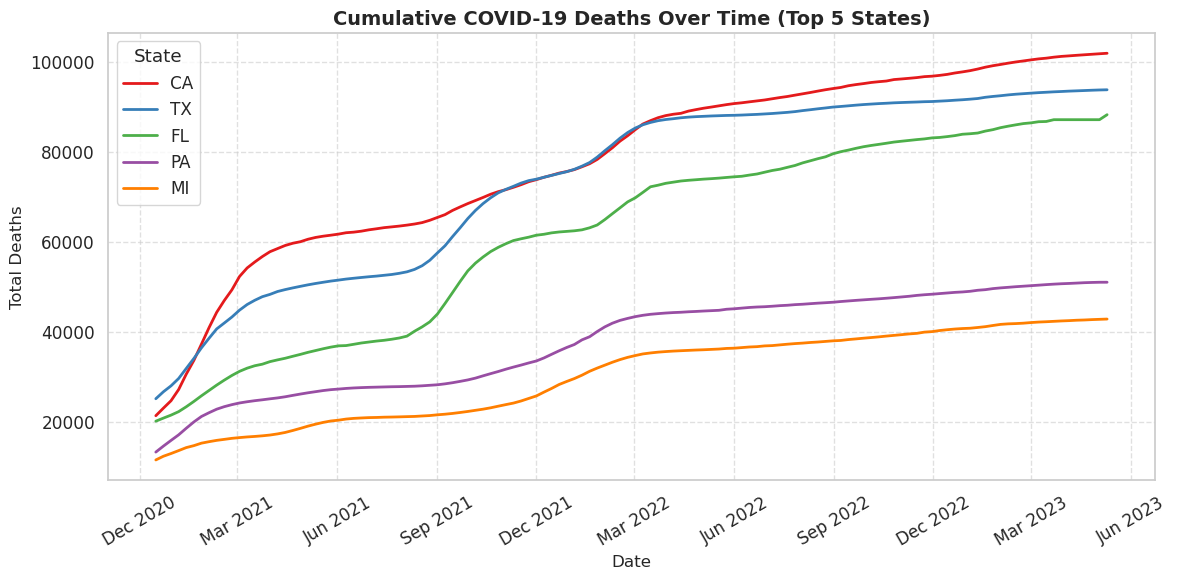

In [44]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))

# Define Top 5 States
top5_states = ['CA', 'TX', 'FL', 'PA', 'MI']

# Plot Total Deaths Over Time
for state in top5_states:
    subset = df_merged[df_merged['state'] == state]
    plt.plot(
        subset['date'],
        subset['total_deaths'],
        linewidth=2,
        label=state
    )

# Add Title and Labels
plt.title('Cumulative COVID-19 Deaths Over Time (Top 5 States)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Add Legend, Grid, and Layout
plt.legend(title='State')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30)
plt.tight_layout()

# Show Plot
plt.show()

**Analysis:**

- California and Texas recorded the highest cumulative COVID-19 deaths among the top 5 states. These states have big populations and faced the largest overall death burdens, but cumulative totals alone don't explain how severe outbreaks were relative to cases.
- All states showed a steady increase in total deaths across the pandemic timeline, reflecting ongoing vulnerability despite public health efforts.

**Chart 2 (Line Graph): Case Fatality Rate (CFR) Over Time for Top 5 States**

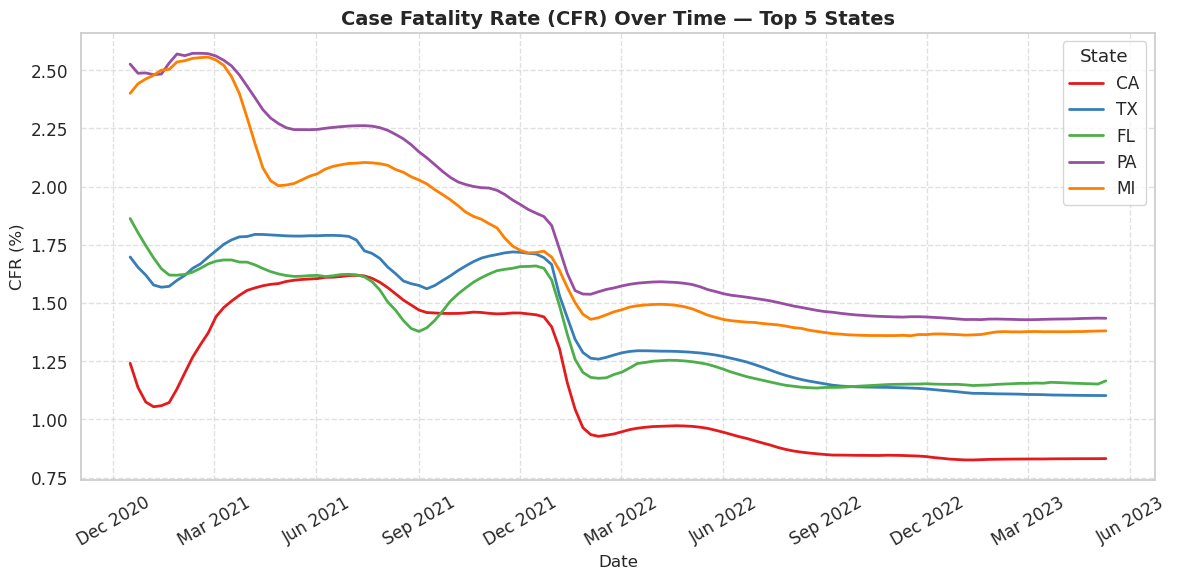

In [56]:
# Define Top 5 States
top5_states = ['CA', 'TX', 'FL', 'PA', 'MI']

# Set Up Figure
plt.figure(figsize=(12, 6))

# Plot CFR for Each State on One Chart
for state in top5_states:
    subset = df_merged[df_merged['state'] == state]
    plt.plot(subset['date'], subset['case_fatality_rate'], linewidth=2, label=state)

# Add Title, Axis Labels, and Legend
plt.title('Case Fatality Rate (CFR) Over Time — Top 5 States', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('CFR (%)', fontsize=12)
plt.legend(title='State')

# Format Date Axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30)

# Grid and Layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show Plot
plt.show()

**Analysis:**

- Instead of just counting deaths, CFR shows how deadly COVID-19 was relative to the number of infections, making it a better metric for comparing severity across states.
- All five states showed decreasing CFR trends from early 2021 to 2023, reflecting improvements in treatment efforts. 
- Pennsylvania (PA) and Michigan (MI) had higher fatality rates initially (>2.5%), suggesting differences in healthcare system strain, demographics, or outbreak timing compared to the others. 
- California has the lowest CFR over time.

**Chart 3 (Line Graph): Vaccination Rates Over Time for Top 5 States**

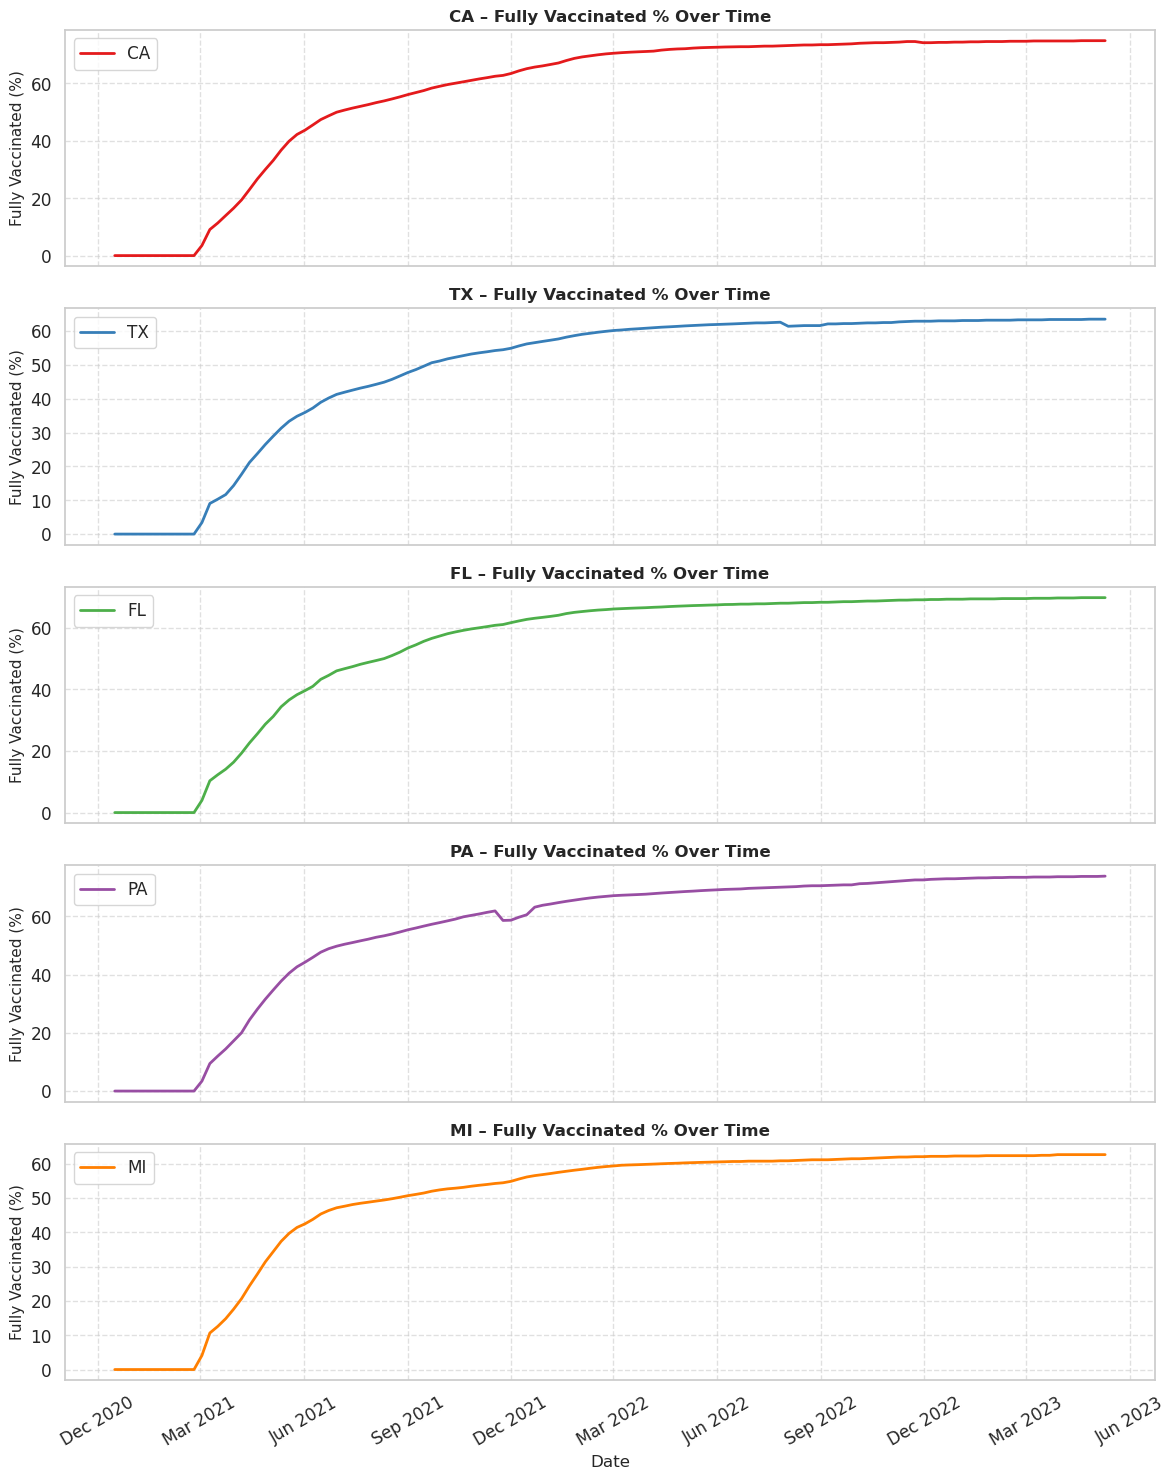

In [63]:
# Define Top 5 States
top5_states = ['CA', 'TX', 'FL', 'PA', 'MI']

# Set Up Subplots and Color Palette
fig, axes = plt.subplots(len(top5_states), 1, figsize=(12, 3 * len(top5_states)), sharex=True)
colors = plt.cm.Set1.colors

# Plot for Each State
for i, state in enumerate(top5_states):
    ax = axes[i]
    subset = df_merged[df_merged['state'] == state]
    ax.plot(subset['date'], subset['fully_vaccinated_pct'], linewidth=2, color=colors[i], label=state)
    ax.set_title(f"{state} – Fully Vaccinated % Over Time", fontsize=12, fontweight='bold')
    ax.set_ylabel("Fully Vaccinated (%)", fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

# Format Shared X-axis (on bottom plot)
axes[-1].set_xlabel("Date", fontsize=12)
axes[-1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=30)

# Final Layout
plt.tight_layout()
plt.show()

**Analysis:**

- All five states show an increase in vaccination rates starting around early 2021, reflecting the initial mass vaccine rollout.
- California (CA) and Pennsylvania (PA) reached the highest vaccination rates (~75%), while Texas (TX), Florida (FL), and Michigan (MI) plateaued earlier around ~60–65%. 
- Higher vaccination rates (especially in CA and PA) correlate with lower observed case fatality rates (CFR) over time as seen previously, suggesting that vaccination coverage helped reduce fatality risks.

**Chart 4 (Scatter Plot): Fully Vaccinated % vs. Case Fatality Rate (CFR)**

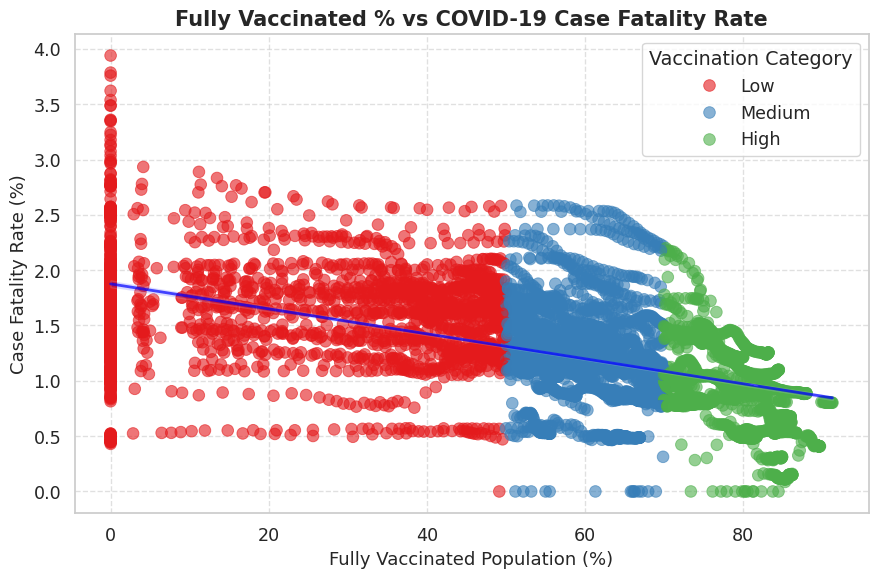

In [66]:
# Set Up Figure and Style
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid", font_scale=1.15)

# Plot Scatter Points by Vaccination Category
sns.scatterplot(
    data=df_merged,
    x='fully_vaccinated_pct',
    y='case_fatality_rate',
    hue='vaccination_category',
    palette='Set1',
    alpha=0.6,
    s=70,
    edgecolor=None
)

# Add Regression Line
sns.regplot(
    data=df_merged,
    x='fully_vaccinated_pct',
    y='case_fatality_rate',
    scatter=False,
    color='blue',
    line_kws={'linewidth': 2, 'alpha': 0.7}
)

# Add Title, Labels, Legend, and Grid
plt.title('Fully Vaccinated % vs COVID-19 Case Fatality Rate', fontsize=15, fontweight='bold')
plt.xlabel('Fully Vaccinated Population (%)', fontsize=13)
plt.ylabel('Case Fatality Rate (%)', fontsize=13)
plt.legend(title='Vaccination Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show Plot
plt.show()

**Analysis:**
- As vaccination rates increased, the case fatality rate (CFR) generally decreased, indicating a modest negative correlation.
- After states surpassed 60–70% full vaccination, CFR values mostly clustered below 1%, suggesting enhanced protection against severe outcomes due to broader vaccine coverage.

**Chart 5 (Scatter Plot): Booster Dose % vs Case Fatality Rate**

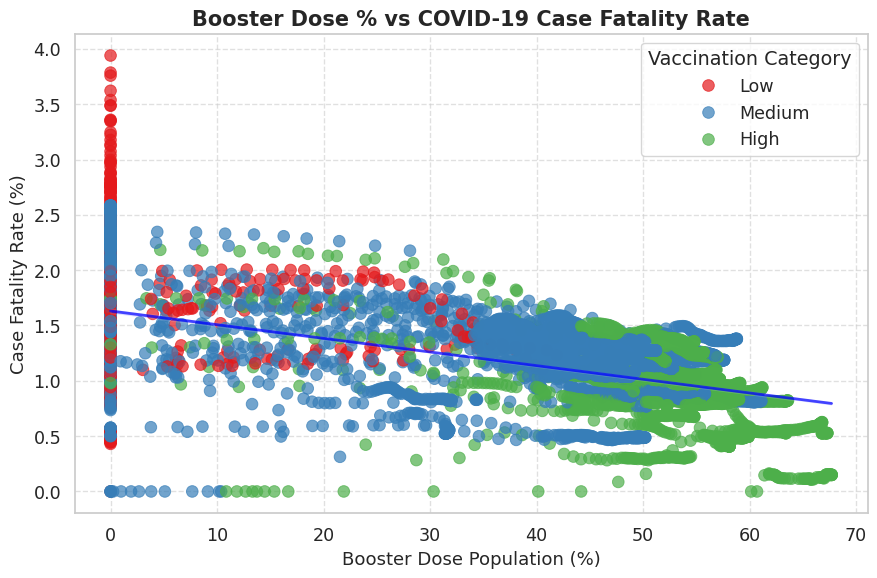

In [68]:
# Set Up Figure and Style
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid", font_scale=1.15)

# Plot Scatter Points by Vaccination Category
sns.scatterplot(
    data=df_merged,
    x='booster_pct',
    y='case_fatality_rate',
    hue='vaccination_category',
    palette='Set1',
    alpha=0.7,
    s=70,
    edgecolor=None
)

# Add Regression Line
sns.regplot(
    data=df_merged,
    x='booster_pct',
    y='case_fatality_rate',
    scatter=False,
    color='blue',
    line_kws={'linewidth': 2, 'alpha': 0.7}
)

# Add Title, Labels, Legend, and Grid
plt.title('Booster Dose % vs COVID-19 Case Fatality Rate', fontsize=15, fontweight='bold')
plt.xlabel('Booster Dose Population (%)', fontsize=13)
plt.ylabel('Case Fatality Rate (%)', fontsize=13)
plt.legend(title='Vaccination Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show Plot
plt.show()

**Analysis:**

- Higher booster coverage generally associates with lower case fatality rates, though the relationship remains weak and scattered. 
- As booster coverage surpassed ~30–40%, more observations showed CFRs clustering below 1%, suggesting potential benefits in reducing severe outcomes at higher booster uptake levels.
- Many data points with low booster rates (<20%) show wide variability in CFRs, highlighting that broader systemic factors also play major roles.

**Chart 6 (Scatter Plot): Vaccination % vs. Total Deaths**

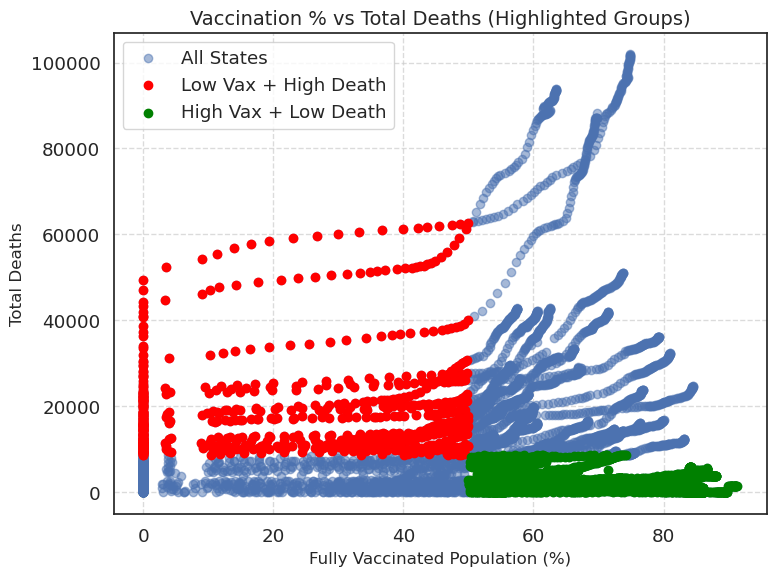

In [71]:
# Define Thresholds
low_vax = df_merged['fully_vaccinated_pct'] < 50
high_deaths = df_merged['total_deaths'] > df_merged['total_deaths'].median()

# Create Highlighted Subsets
low_vax_high_death = df_merged[low_vax & high_deaths] # Underperforming
high_vax_low_death = df_merged[(~low_vax) & (~high_deaths)] # Best-performing

# Create Figure 
plt.figure(figsize=(8,6))

# Plot All States 
plt.scatter(df_merged['fully_vaccinated_pct'], df_merged['total_deaths'], alpha=0.5, label='All States')

# Plot Subsets 
plt.scatter(low_vax_high_death['fully_vaccinated_pct'], low_vax_high_death['total_deaths'], color='red', label='Low Vax + High Death')
plt.scatter(high_vax_low_death['fully_vaccinated_pct'], high_vax_low_death['total_deaths'], color='green', label='High Vax + Low Death')

# Add Title and Labels
plt.title('Vaccination % vs Total Deaths (Highlighted Groups)', fontsize=14)
plt.xlabel('Fully Vaccinated Population (%)', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Add Legend, Grid, and Layout 
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Shot Plot 
plt.show()

**Analysis:**

- Low vaccination + high death states (red) cluster at lower vaccination rates and higher total deaths.
- High vaccination + low death states (green) cluster at higher vaccination rates and lower death counts.
- All other states (blue) scatter between the two extremes, indicating that vaccination was important but other factors (population size, health access) also influenced death totals.

**Chart 7 (Box Plot): Case Fatality Rate (CFR) by Vaccination Coverage Category**

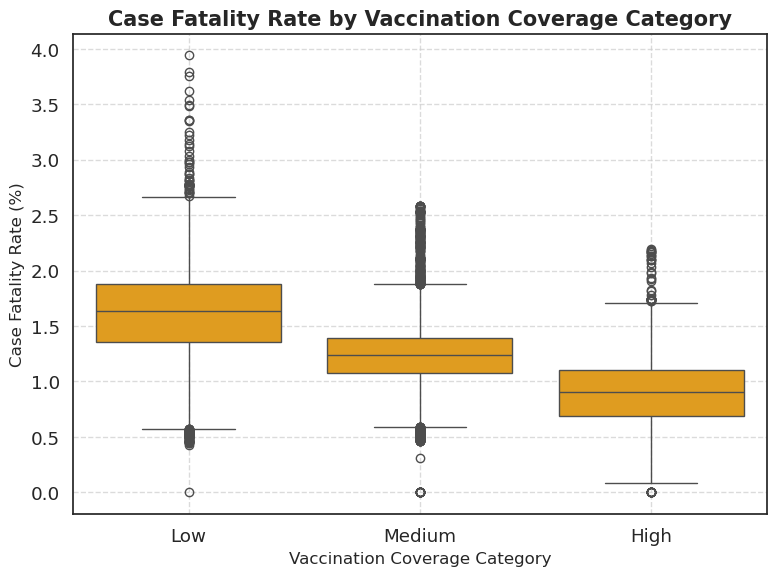

In [72]:
# Create Figure
plt.figure(figsize=(8,6))

# Draw Boxplot 
sns.boxplot(
    x='vaccination_category', 
    y='case_fatality_rate', 
    data=df_merged,
    order=['Low', 'Medium', 'High'],
    color='orange'  # <-- manually specifying order
)

# Add Title and Labels 
plt.title('Case Fatality Rate by Vaccination Coverage Category', fontsize=15, fontweight='bold')
plt.xlabel('Vaccination Coverage Category', fontsize=12)
plt.ylabel('Case Fatality Rate (%)', fontsize=12)

# Add Grid and Layout 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show Plot 
plt.show()

**Analysis:**

- Higher vaccination coverage ("High") is associated with lower median case fatality rates and fewer extreme outliers.
- Lower vaccination coverage ("Low") shows higher median CFRs and greater variability, indicating worse COVID-19 outcomes.
- As vaccination coverage improves (Low → Medium → High), case fatality rates tend to decrease.

**Chart 8 (Scatter Plot): Elderly Protection Index vs Total Deaths**

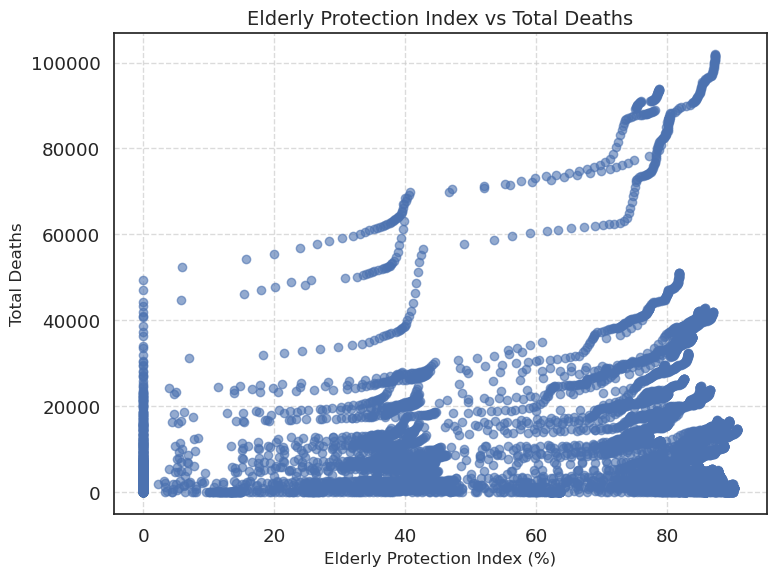

In [73]:
# Create Figure 
plt.figure(figsize=(8,6))

# Plot Elderly Protection Index vs. Total Deaths 
plt.scatter(df_merged['elderly_protection_index'], df_merged['total_deaths'], alpha=0.6)

# Add Title and Labels 
plt.title('Elderly Protection Index vs Total Deaths', fontsize=14)
plt.xlabel('Elderly Protection Index (%)', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Add Grid and Layout 
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show Plot 
plt.show()

**Analysis:**

- States with higher elderly protection (60%–90%) still experienced a spread in total deaths, implying that other factors like outbreak size, timing, or healthcare access mattered.

**Chart 9 (Heatmap): Correlation Matrix of Key Metrics**

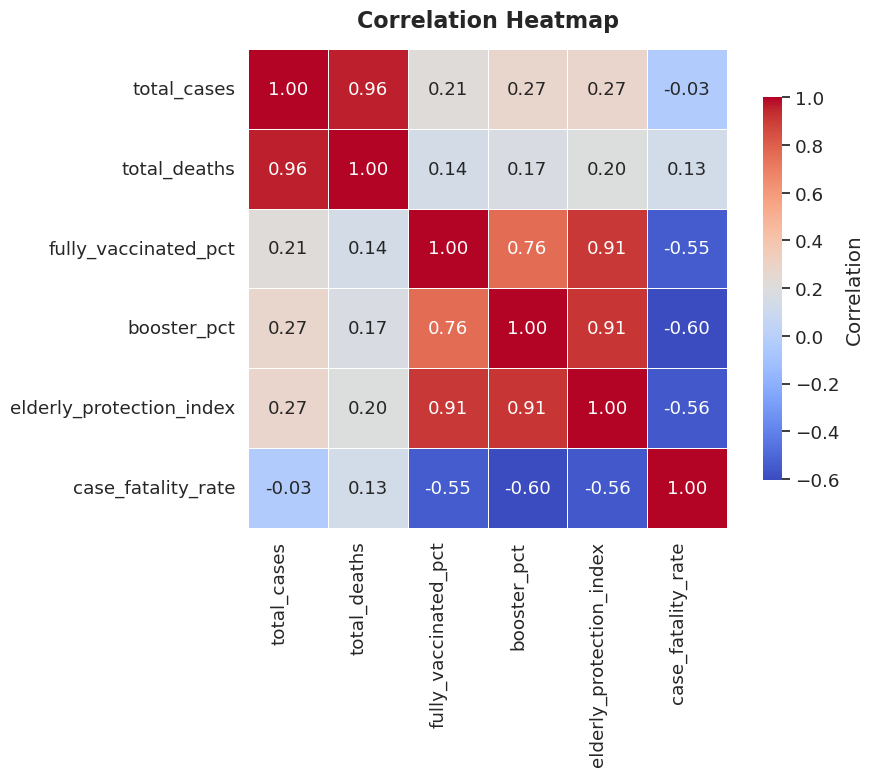

In [74]:
# Pick Numeric Columns Only
corr_columns = [
    'total_cases',
    'total_deaths',
    'fully_vaccinated_pct',
    'booster_pct',
    'elderly_protection_index',
    'case_fatality_rate'
]

# Calculate Correlation Matrix
corr_matrix = df_merged[corr_columns].corr()

# Create Heatmap with Seaborn Styling
plt.figure(figsize=(10, 8))
sns.set(style="white", font_scale=1.2)

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
    annot_kws={"size": 13}
)

# Add Title and Ticks
ax.set_title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=16)
plt.yticks(rotation=0)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show Plot
plt.show()

**Analysis:**

- Vaccination metrics (full vaccination %, booster %, elderly protection index) show strong positive correlations with each other (0.76–0.91), indicating that states with higher initial vaccination rates also tended to have higher booster uptake.
- CFR is moderately negatively correlated with vaccination measures (around -0.55 to -0.60), supporting that better vaccination coverage is associated with lower death severity.
- Total cases and deaths are highly correlated (0.96).

## **Step 6: SQL Queries Analysis**

To strengthen the insights in this report, I conducted a series of 12 structured SQL queries. Visual summaries were generated using .csv outputs from the SQL notebook, helping translate raw data into interpretable insights. See the [`SQL Queries- Bisma Rana.ipynb`](<SQL Queries– Bisma Rana.ipynb>) file for all detailed queries and their explanations. This report only includes the relevant ones for conciseness.

### **Query 4: Most Affected States Ranked #1 in Weekly New Cases**

**Query Type**: *Window Function*  
**CSV Source**: `sql_results/query_4.csv`

> **What was the goal of this query?**  
To determine which U.S. states most frequently ranked #1 for the highest number of new COVID-19 cases in a given week.

> **What did the SQL query do?**  
I used the `RANK()` window function to rank all states by new case count each week. After filtering for only the states that ranked #1 on each date, we counted how many weeks each state held the top spot.

> **What does the result show?**  
The bar chart below reveals that **California** was ranked #1 for new COVID-19 cases in 97 separate weeks, far surpassing all other states. Florida and Texas followed with 25 and 24 weeks respectively. This highlights how larger, more populous states experienced sustained surges in case volume.

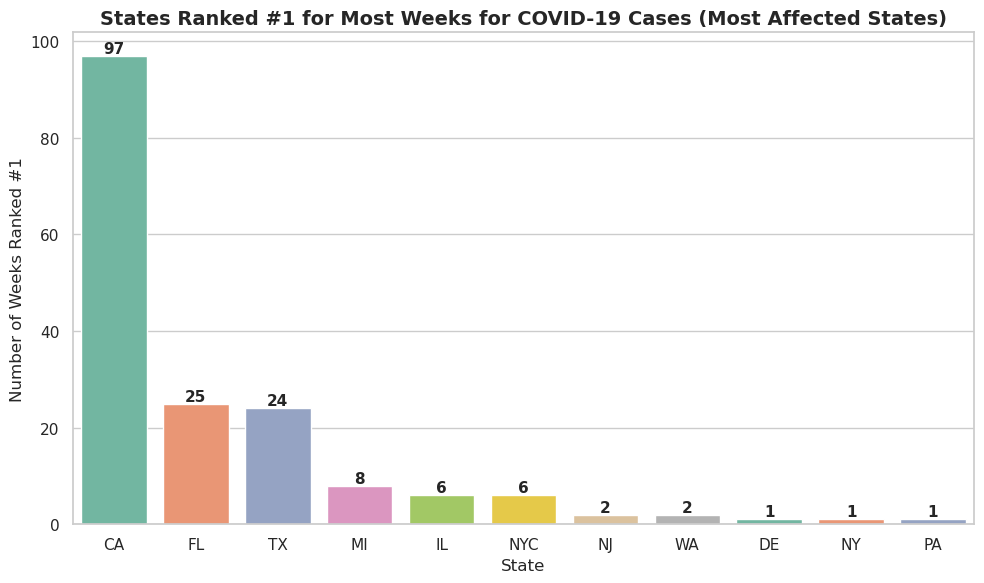

In [84]:
# Load Query Results CSV
most_affected_states = pd.read_csv("sql_results/query_4.csv")

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Barplot Using Hue
ax = sns.barplot(
    data=most_affected_states,
    x="state",
    y="num_weeks_rank1",
    hue="state",
    palette="Set2",
    dodge=False  # Prevents grouped bars since hue == x
)

# Remove Legend
if ax.get_legend() is not None:
    ax.get_legend().remove()

# Add Title and Labels
ax.set_title("States Ranked #1 for Most Weeks for COVID-19 Cases (Most Affected States)", fontsize=14, fontweight="bold")
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("Number of Weeks Ranked #1", fontsize=12)

# Add Value Labels
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

# Show Plot
plt.tight_layout()
plt.show()

**Analysis:**
- Most Affected States are CA, FL, TX with 97, 25, 24 weeks of ranked no.1 in death cases.

### **Query 5: National Week-over-Week % Change in New Cases**

**Query Type**: *Window Function*  
**CSV Source**: `sql_results/query_5.csv`

> **What was the goal of this query?**  
To calculate how weekly COVID-19 cases changed nationally from one week to the next, helping identify spikes, surges, or drops over time.

> **What did the SQL query do?**  
It used a `LAG()` window function to compare each week’s total new case count to the prior week’s count, then calculated the percent change between them.

> **What does the result show?**  
The output shows the weekly trend of national COVID-19 spread, capturing both extreme early spikes and later stabilization. It gives insight into when the pandemic was accelerating or cooling off.

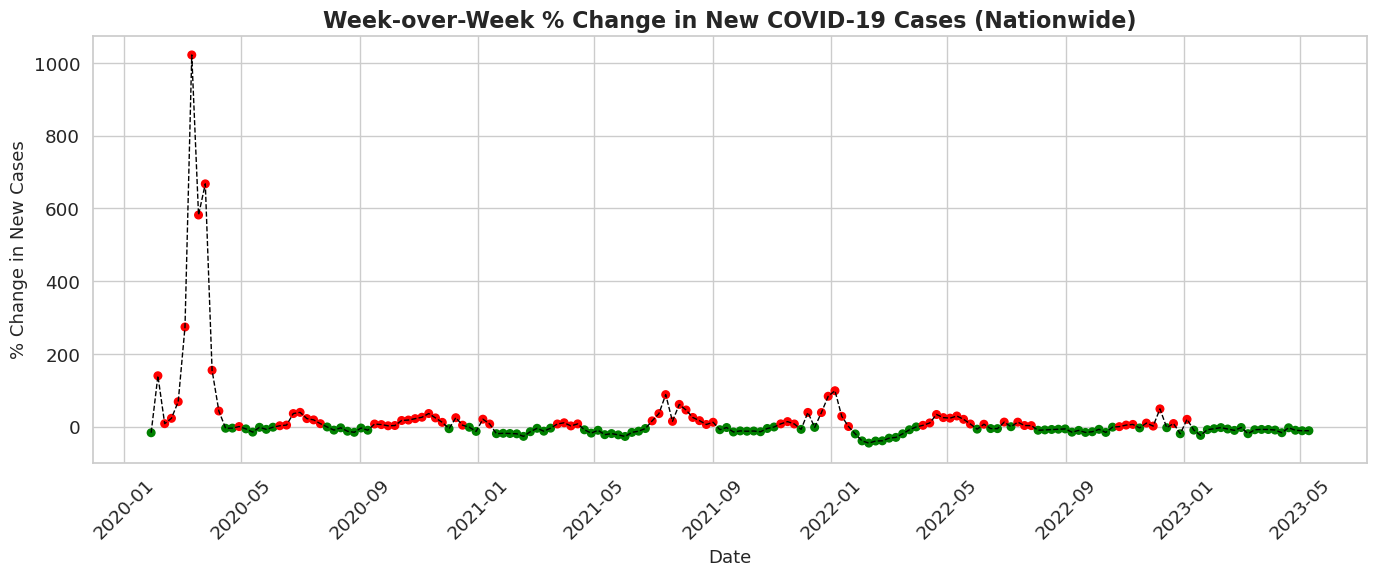

In [85]:
# Load Query Results CSV
national_wow = pd.read_csv("sql_results/query_5.csv")

# Convert Date Column
national_wow['date'] = pd.to_datetime(national_wow['date'])

# Set Color Palette
colors = national_wow['percent_change'].apply(lambda x: 'red' if x > 0 else 'green')

# Plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", font_scale=1.2)

# Scatter for Color Coding, Line for Continuity
plt.scatter(national_wow['date'], national_wow['percent_change'], c=colors, s=30, label='WoW % Change')
plt.plot(national_wow['date'], national_wow['percent_change'], color='black', linewidth=1, linestyle='--')

# Labels and Formatting
plt.title("Week-over-Week % Change in New COVID-19 Cases (Nationwide)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=13)
plt.ylabel("% Change in New Cases", fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

# Show Plot 
plt.show()

**Analysis:**

- **Early 2020 Surge:** In the early weeks of 2020, there's an extreme spike (1000%+ WoW growth) as COVID-19 spread rapidly from near-zero case counts.
- **Post-Mid-2020 Stabilization:** After mid-2020, the % change stabilized to more moderate fluctuations, typically between -30% to +30%, reflecting a more controlled spread.
- **Variant Waves:** Notable increases during late 2020, mid-2021, and early 2022 align with Delta and Omicron variant surges.
- **Recent Trends:** The curve flattens in 2022–2023, indicating minimal WoW change. This suggests transmission was more controlled due to widespread vaccination and prior exposure.

### **Query 6: First Week with Reported COVID-19 Cases (> 0) Per State**

**Query Type**: *Window Function*  
**CSV Source**: `sql_results/query_6.csv`

> **What was the goal of this query?**  
To identify the first week each U.S. state reported actual COVID-19 activity — defined as the first week with more than 0 new cases.

> **What did the SQL query do?**  
It filtered the data to include only rows with `new_cases > 0`, then used the `ROW_NUMBER()` window function partitioned by state to rank rows by date. The query returned only the first occurrence of new cases per state.

> **What does the result show?**  
This output reveals the earliest reported week of COVID-19 activity in each state. For example, states like **DE, WA, and AZ** reported their first new cases in late January 2020, offering insight into how the virus initially spread across the country.

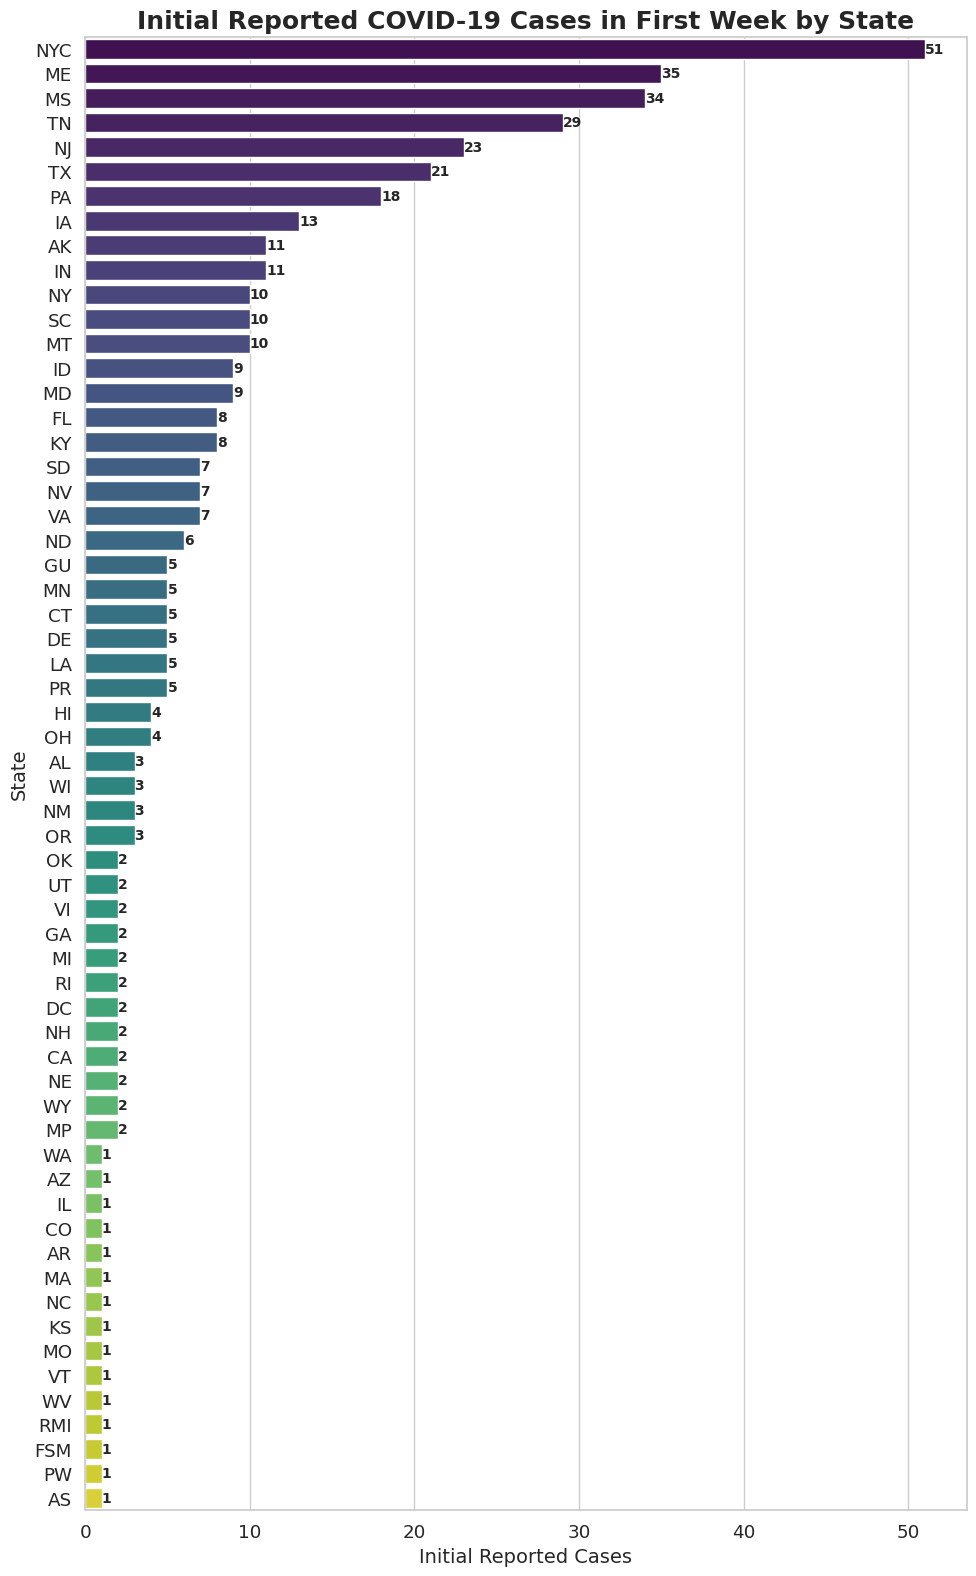

In [90]:
# Load CSV
first_week_data = pd.read_csv("sql_results/query_6.csv")

# Sort by reported cases
plot_data = first_week_data.sort_values(by="initial_reported_cases", ascending=False)

# Plot setup
plt.figure(figsize=(10, 16))
sns.set(style="whitegrid", font_scale=1.2)

# Horizontal bar plot with colored bars by state
ax = sns.barplot(
    data=plot_data,
    y="state",
    x="initial_reported_cases",
    hue="state",         # distinct colors
    dodge=False,
    palette="viridis"
)

# Remove legend if it exists
if ax.legend_:
    ax.legend_.remove()

# Titles and labels
ax.set_title("Initial Reported COVID-19 Cases in First Week by State", fontsize=18, fontweight="bold")
ax.set_xlabel("Initial Reported Cases", fontsize=14)
ax.set_ylabel("State", fontsize=14)

# Annotate values
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="left",
        va="center",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()

**Analysis**: 
- NYC leads with the highest number of initial cases (51), reflecting the early and intense outbreak in the New York City area.
- ME, MS, TN, and NJ also show high first-week counts, indicating early exposure and rapid transmission in those states.
- Many states (CA, MI, GA, DC) began with relatively low initial cases.
- A large number of states (WA, AZ, IL, MA, NC) reported only 1 case in their first week, aligning with the idea of isolated initial introductions.

### **Query 9: States with Below-Average Vaccination and Above-Average Deaths**

**Query Type**: *Subquery*  
**CSV Source**: `sql_results/query_9.csv`

> **What was the goal of this query?**  
To identify U.S. states that may be at higher risk due to low vaccination coverage** and **high COVID-19 death rates, which can inform targeted public health interventions.

> **What did the SQL query do?**  
It calculates each state’s average vaccination and death rates using a GROUP BY, then filters results using two scalar subqueries to compare each state to the national average for vaccination and deaths.

> **What does the result show?**  
The output reveals a list of underperforming or vulnerable states, such as Texas, Georgia, and Alabama, where low vaccine uptake may correlate with elevated death burdens, potentially due to vaccine hesitancy, limited healthcare access, or delayed mitigation strategies.

In [92]:
states_vac_deaths = pd.read_csv('sql_results/query_9.csv')
states_vac_deaths

,state,avg_vax,avg_deaths
0,TX,48.928571,555.023810
1,GA,43.902438,260.809524
2,OH,47.917347,258.357143
3,MI,49.427551,255.293651
4,AZ,49.990788,209.285714
5,TN,43.663832,193.468254
6,NC,49.944104,180.238095
7,IN,45.355442,152.039683
8,AL,40.862358,136.158730
9,KY,47.297732,130.992063


**Analysis:**
- States listed show low vaccination and high death rates.
- Texas has the lowest vax rate (49%) and highest weekly deaths (555).
- Georgia, Alabama, and Tennessee also stand out with poor metrics.
- Suggests high-risk areas needing stronger public health support.

### **Query 11: COVID Rebound Alert — Weeks with ≥ 50% Spike in New Cases**

**Query Type**: *CTE*  
**CSV Source**: `sql_results/query_11.csv`

> **What was the goal of this query?**
To identify weeks where COVID-19 cases spiked by more than 50% nationally — signaling potential rebounds in transmission and helping flag periods of concern.

> **What did the SQL query do?**  
It used a CTE to calculate total new weekly cases across all states, then applied the `LAG()` window function to compare each week’s total with the previous week. It computed the percent change and filtered for weeks with a ≥ 50% increase.

> **What does the result show?**  
The output lists all weeks with extreme case spikes — especially early in the pandemic. For example, March 11, 2020 showed a 1021% jump, marking a key moment of exponential COVID-19 spread.

In [91]:
spike_alerts_week = pd.read_csv('sql_results/query_11.csv')
spike_alerts_week

,date,total_new_cases,prev_week_cases,percent_change
0,2020-02-05 00:00:00,12.0,5.0,140.00
1,2020-02-26 00:00:00,27.0,16.0,68.75
2,2020-03-04 00:00:00,101.0,27.0,274.07
3,2020-03-11 00:00:00,1133.0,101.0,1021.78
4,2020-03-18 00:00:00,7725.0,1133.0,581.82
5,2020-03-25 00:00:00,59286.0,7725.0,667.46
6,2020-04-01 00:00:00,151264.0,59286.0,155.14
7,2021-07-14 00:00:00,251109.0,133430.0,88.20
8,2021-07-28 00:00:00,464744.0,288157.0,61.28
9,2021-12-29 00:00:00,2141043.0,1165714.0,83.67


**Analysis**:
- These are the weeks where there was a significant spike in new cases i.e > 50%, indicating a potential rebound in COVID-19 transmission.
- On 11th March 2020, the largest spike of 1021% was reported.

## **Step 7: Machine Learning Model**

### Predict Weekly New COVID-19 Cases Based on Vaccination Coverage (Linear Regression)

**Goal**  
To estimate how different levels of vaccination coverage impact the number of new COVID-19 cases reported in a given week across U.S. states.

**Approach**  
I trained a Linear Regression model using:
- `Fully vaccinated percentage`  
- `Booster coverage percentage`  
- `One dose coverage percentage`  
- `Week number` *(engineered from date)*  
- `State` *(encoded using one-hot encoding)*
  
These features were selected to reflect vaccine-driven immunity over time and account for geographic/state-level variation in case patterns.

- **Week Number**: Extracted from the `date` column to capture time-based trends.  
- **Encoded State**: Converted categorical state names into binary flags using one-hot encoding to include spatial variation without introducing ordinal bias.

**Evaluation**  
The model's performance was evaluated using R² score and RMSE. A scatter plot of actual vs. predicted case counts shows how well the model generalizes to unseen data.

**Step 1: Import Required Libraries**

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [95]:
df_merged.columns

Index(['state', 'start_date', 'date', 'total_cases', 'total_deaths',
       'new_cases', 'new_deaths', 'fully_vaccinated_pct', 'one_dose_pct',
       'booster_pct', 'fully_vaccinated_65plus_pct', 'booster_65plus_pct',
       'case_fatality_rate', 'vaccination_category',
       'elderly_protection_index', 'fatality_risk'],
      dtype='object')

**Step 2: Feature Engineering & Data Preparation**

In [98]:
# Select Relevant Features and Drop Nulls
model_df = df_merged[
    ["new_cases", "new_deaths", "fully_vaccinated_pct", 
     "booster_pct", "one_dose_pct", "date", "elderly_protection_index"]
].dropna()

# Create a 'Week' Feature to Encode Time Progression
model_df["week"] = model_df["date"].dt.isocalendar().week

**Step 3: Train-Test Split**

In [99]:
# Define X and y
X = model_df.drop(columns=["new_cases", "date"])
y = model_df["new_cases"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5701, 6) (1426, 6)
(5701,) (1426,)


**Step 4: Model Training**

In [102]:
# Instantiate and Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Step 5: Prediction and Evaluation Metrics**

In [103]:
# Predict on Test Data
y_pred = lr.predict(X_test)

# Evaluate Model using R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.291
RMSE: 18283.81


**Analysis:**

R²:
> - R² measures how much of the variation in the target (new_cases) is explained by the model
> - A score of 0.291 means the model explains about 29.1% of the variance. This is low, but not meaningless.
> - This suggests that vaccination features alone aren’t enough to predict exact case counts accurately, which is expected in a real-world setting where many other factors (like mobility, variants, testing rates, policy) impact spread.

RMSE: 
> - This means the average prediction error is ~18283 cases.
> - Given that weekly case counts in some states go up to 100,000+ (as shown in the plot), this is a sizeable but not terrible error.
> - RMSE is sensitive to outliers, and COVID data is full of spikes.

**Step 6: Actual vs. Predicted Scatter Plot**

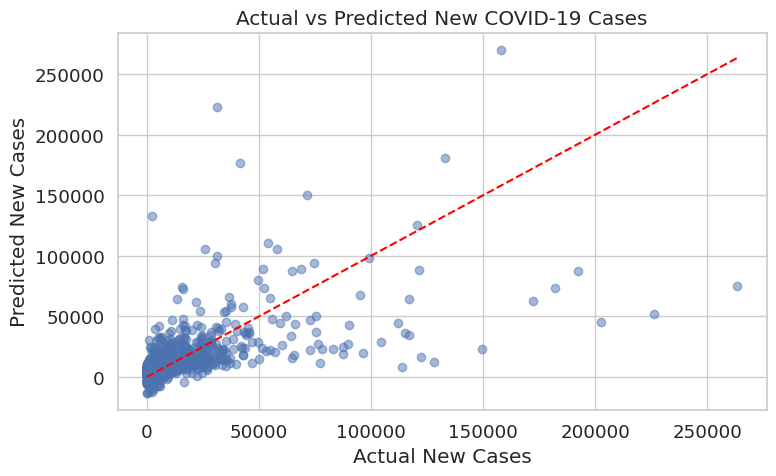

In [104]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual New Cases")
plt.ylabel("Predicted New Cases")
plt.title("Actual vs Predicted New COVID-19 Cases")
plt.tight_layout()
plt.show()

**Analysis**:

- Most predictions are clustered near the bottom left (0–50,000 range), suggesting the model captures low/moderate case weeks better.
- However, it underperforms on high-case weeks (dots well below the red line), which drags down R².
- This is common in linear models when data has outliers or a nonlinear pattern.

**Step 7: Feature Importance (Coefficient Plot)**

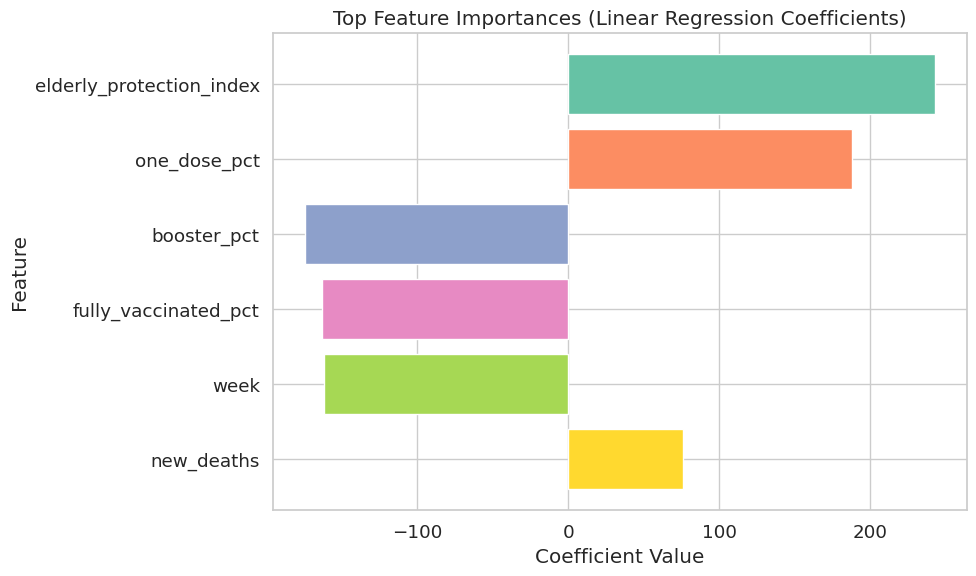

In [116]:
# Create Coefficient DataFrame
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

# Define Top N
top_n = 10
top_features = coef_df.head(top_n)

# Manually Assign Colors (length = top_n)
bar_colors = sns.color_palette("Set2", n_colors=top_n)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    y=top_features["Feature"],
    width=top_features["Coefficient"],
    color=bar_colors  # assign directly to matplotlib's barh
)

plt.title("Top Feature Importances (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

**Analysis**:
- Higher vaccination rates (booster and fully vaccinated) are linked to fewer predicted cases (negative coefficients).
- Week has a negative coefficient, suggesting declining case trends over time.
- Elderly protection index and one dose percentage are positively correlated with cases (may be reactive to rising cases).
- New deaths are positively associated, likely reflecting trailing indicators of case spikes.
- Confirms that vaccination coverage helps reduce COVID-19 spread, even in a simple linear model.

## **Conclusion**

#### Major Findings  
> - **Higher vaccination coverage** was associated with **lower case rates**, though the effect size was moderate.  
> - **Booster and bivalent booster uptake** varied widely across states and often lagged behind initial dose rates.  
> - The **Elderly Protection Index** showed a **negative correlation with death rates**, reinforcing the need to protect vulnerable populations.  
> - **California, Florida, and Texas** ranked highest in cumulative weekly death counts, with CA alone ranked #1 for 97 weeks.  
> - **Week-over-week change** analysis captured key spikes during initial waves, particularly March 2020 (>1000% spike).  
> - States like **NYC** saw early, intense outbreaks (51 cases in Week 1), while others like **WA, MA, NC** began with only 1 case.  
> - Some states (e.g., **TX, GA, AL, TN**) showed both **low vaccine uptake** and **high fatality**, indicating high-risk zones.


#### Modeling Insights  
> - A **linear regression model** explained ~29% of weekly case variance, suggesting vaccination levels alone can’t fully predict case surges.  
> - **RMSE was ~18,283**, driven by spikes and variance in the data — expected for real-world epidemiology.  
> - The model **performed better on low/moderate weeks**, but **underestimated extreme surges**, a common issue in linear models.  


#### Feature Importance Interpretation  
> - **Booster %** and **fully vaccinated %** had **negative coefficients**, indicating **higher coverage → fewer predicted new cases**.  
> - The feature **week** had a negative trend, suggesting case declines over time.  
> - **Elderly protection index** and **one-dose %** showed **positive coefficients**, likely increasing in reaction to outbreaks.  
> - **New deaths** also had a positive association with cases, reflecting lagging mortality effects.  


#### Limitations and Future Work  
> - The study used **state-level aggregates** and did not normalize by **population size**.  
> - It did not account for **socioeconomic factors** (e.g., rural vs. urban, healthcare access), which could improve interpretation.  
> - Future iterations could apply **classification models**, **time series forecasting**, or even **causal inference techniques**.  
> - **SQLite** limitations required simulating a **stored procedure**, which was documented using standard SQL logic.  

#### Closing Thoughts  
> - This project highlighted the role of **data-driven storytelling** in explaining pandemic patterns and informing public health.  
> - Continuing to track vaccination gaps and vulnerable populations remains essential for future preparedness and health equity.